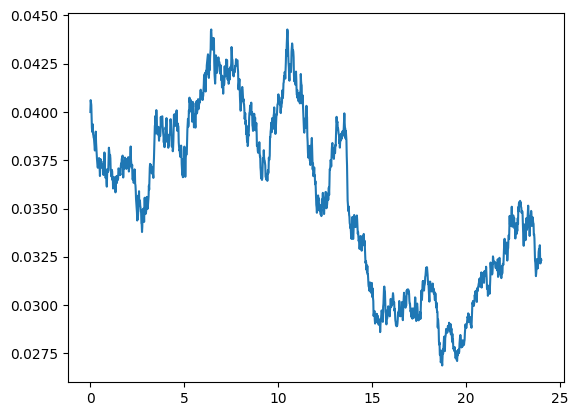

In [62]:
import math
import random

import pandas as pd
import numpy as np
from scipy.stats import norm
import scipy.stats
import torch
import matplotlib.pyplot as plt
#Generate Brownian
def brownian_generator(length):
        brownian_motion =  [0]
        for i in range(length-1):
            brownian_motion.append(brownian_motion[-1] + torch.randn(1)/math.sqrt(252))
        return brownian_motion
#The two swap rates follow GBM, euro starts at 4%, cad starts at 5%
euro_start = 0.04
cad_start = 0.05
r = 0
m = 6*252
T = torch.linspace(0,24, m)
plotting =  torch.linspace(0,6*252,m)
vol = 0.15
b = torch.Tensor(brownian_generator(m))
euro = euro_start*torch.exp((r-(vol*vol)/2)*T + vol*b)
for i in range(499):
    euro += euro_start*torch.exp((r-(vol*vol)/2)*T + vol*b)
euro /= 500
plt.plot(T, euro)